## Project : Predicting  Medical Appointment No Shows
by Obiorah Philip (2304216)

### 1.0 Business Understanding:

#### 1.1 Background Study:
> No-shows for medical appointments is a widespread and serious problem in the healthcare industry. Patients who miss their appointments can cause inefficiencies in the healthcare system, waste of resources, higher expenses, and delays in other patients' access to care. Healthcare practitioners can increase patient attendance rates and streamline their scheduling procedures by being aware of the variables that lead to appointment no-shows. Failure to attend outpatient visits has a detrimental influence on the healthcare result. Thus, healthcare organisations are focusing on new prospects, one of which is to increase healthcare quality.

> The goal of this project is to create a predictive model that can reliably predict whether or not a patient will show up for a planned medical visit. Healthcare practitioners may adopt focused interventions and initiatives to minimise no-show rates, optimise resource allocation, and improve overall patient care by understanding the primary variables impacting no-shows.

### 1.2 Project Overall Aim and Business Objectives:
> The ultimate goal of this research is to develop a prediction model that can accurately forecast if a patient will attend a medical visit. The following business objectives have been defined to attain this goal:

- Develop a thorough grasp of the dataset: Investigate the dataset of 110,527 medical appointments offered and learn about the characteristics and factors linked with each session.

- Determine the following data mining tasks: Determine possible data mining tasks that may be applied to the dataset in order to meet the project goal. Classification, feature selection, data preparation, and model assessment may all be included.

- Connect corporate goals to data mining tasks: Determine the link between the defined business goals and the individual data mining tasks. Choosing relevant features that have a major influence on appointment no-shows, for example, or using a classification model to predict no-show results.




### 1.3 Literature Review:
>Predicting medical appointment attendance has piqued the interest of researchers in the field of healthcare because of its potential influence on resource optimisation, patient care, and overall operational efficiency. Data mining techniques have been widely used to address this issue and identify trends and variables influencing appointment no-shows. Several research have investigated various strategies and approaches, proving data mining's promise in this subject.

> To anticipate medical appointment no-shows, classification techniques such as decision trees, logistic regression, support vector machines, and random forests have been widely employed. These algorithms use patient-related characteristics, scheduling considerations, and historical data to create models that can tell the difference between patients who are more likely to show up and those who are more likely to not show up.

> Another important factor in determining appointment attendance is feature selection. To determine the most relevant characteristics that contribute substantially to appointment no-shows, researchers used approaches such as information gain, chi-square, and correlation analysis. Models with increased accuracy and interpretability may be developed by selecting informative characteristics.

### 2.0 Data exploration and understanding.

#### Load the dataset

In [263]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
#load the dataset 
df = pd.read_csv("KaggleV2-May-2016.csv")
#view the dataset
print("\nFirst Few rows of the Dataset:")
df.sample(10)
df.shape


First Few rows of the Dataset:


(110527, 14)

> Dataset consists of 110,527 medical visits, each with 14 variables (characteristics). The key goal variable in the dataset is whether or not the patient arrived for their planned appointment. The dataset contains a variety of appointment and patient-related features that may be studied to acquire a full view of the data.

> Data  Source: https://www.kaggle.com/datasets/joniarroba/noshowappointments
> The initial examination of the data set include reviewing the dataset's general features and determining the data's quality. This step aids in the identification of any data abnormalities, missing values, outliers, and possible concerns that may effect the succeeding analysis and modelling phases.

- PatientId: This variable represents the unique identification number assigned to each patient. It serves as a unique identifier for patients in the dataset.

- AppointmentID: This variable consists of seven-digit numbers assigned to each appointment. It serves as a unique identifier for appointments in the dataset.

- Gender: This variable indicates the gender of the patient. It helps identify whether the patient is male or female.

- ScheduledDay: This variable represents the date and time when the appointment was scheduled or arranged by the patient.

- AppointmentDay: This variable represents the specific day when the appointment was booked by the patient. It specifies the date of the appointment.

- Age: This variable indicates the age of the patient. It represents the patient's age at the time of the appointment.

- Neighbourhood: This variable represents the neighborhood or location where the appointment is scheduled to take place. It identifies the specific area where the medical facility is located.

- Scholarship: This binary variable indicates whether the patient has a scholarship from the government support program in Brazil. A value of 1 indicates the patient has a scholarship, while 0 indicates the absence of a scholarship.

- Hipertension: This binary variable indicates whether the patient has been diagnosed with high blood pressure (hypertension). A value of 1 indicates the patient has hypertension, while 0 indicates the absence of hypertension.

- Diabetes: This binary variable indicates whether the patient has been diagnosed with diabetes. A value of 1 indicates the patient has diabetes, while 0 indicates the absence of diabetes.

- Alcoholism: This binary variable indicates whether the patient has an alcohol addiction. A value of 1 indicates the patient has alcoholism, while 0 indicates the absence of alcoholism.

- Handcap: This binary variable indicates whether the patient has a physical or mental disability. A value of 1 indicates the patient has a disability, while 0 indicates the absence of a disability.

- SMS_received: This variable represents the number of text messages sent to the patient as reminders or notifications related to the appointment.

- No-show: This binary variable indicates whether the patient showed up for the appointment or not. A value of "No" indicates that the patient showed up, while a value of "Yes" indicates that the patient did not show up.



In [264]:
## Display the general informati0n about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [265]:
# We check for missing values
print("\nMissing Values: ")
print(df.isnull().sum())


Missing Values: 
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [266]:
# Check for missing or incomplete data
print("\nMissing Values")
df.isna().any()



Missing Values


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [267]:
print("\nCheck of Duplicate Values")
print("Number of Duplicates : " , df.duplicated().sum())


Check of Duplicate Values
Number of Duplicates :  0


In [268]:
# Let check for outliers
print("Check for outliers")
print(df.describe())

Check for outliers
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000   

In [269]:
# Check for inconsistent data types
print("\nData Types:")
print(df.dtypes)
df.dtypes.value_counts()


Data Types:
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


int64      8
object     5
float64    1
dtype: int64

In [270]:
# Specify the columns to check and define the criteria for identifying inconsistent values
inconsistent_values = df[(df['Age'] < 0) | (df['Age'] > 120)]
print("\nInconsistent Values:")
inconsistent_values


Inconsistent Values:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [271]:
#Let check the data distribution
print("\nData Distribution: ")



Data Distribution: 


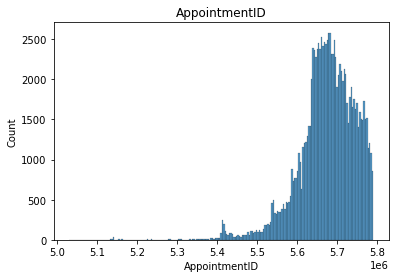

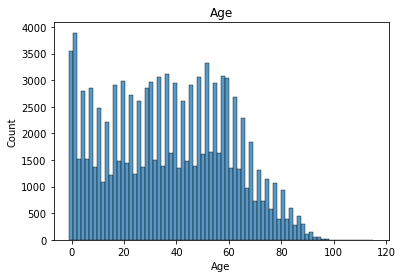

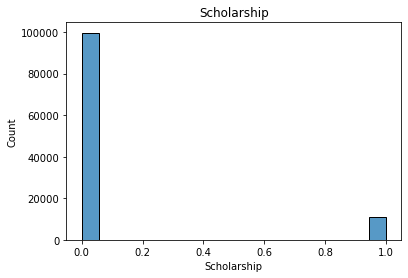

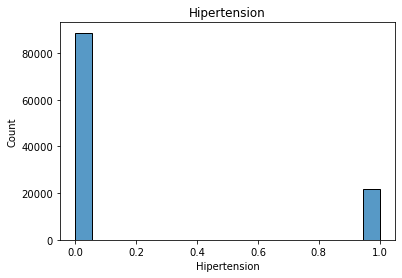

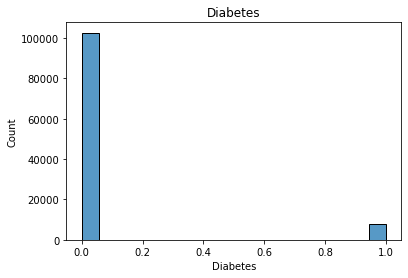

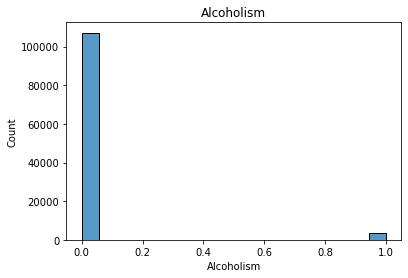

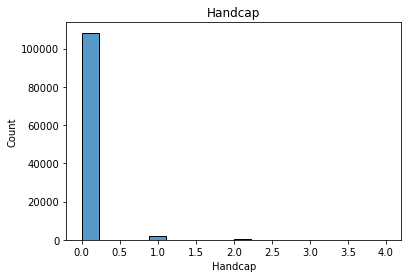

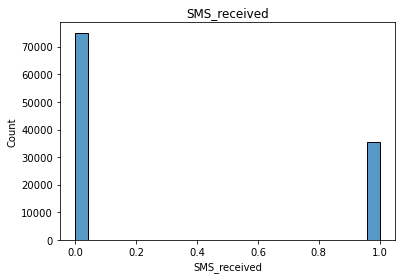

In [272]:
df_numeric_cols = df.select_dtypes(include='int64')
df_numeric_cols
for col in df_numeric_cols:
    print("\n")
    plt.figure()
    sns.histplot(data=df, x = col)
    plt.title(col)
    plt.show()
    print('\n')

In [273]:
print("\nCorrelation")
df.corr()



Correlation


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


<AxesSubplot:>

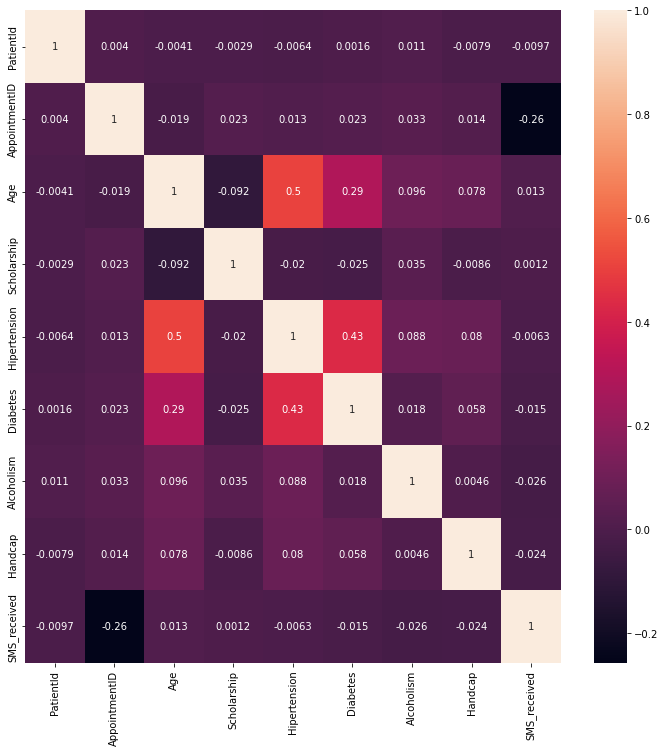

In [274]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)



>The following key aspects and characteristics can be identified through data exploration:

- The dataset contains a large number of medical visits, with a total of 110,527 entries. This size gives a considerable amount of data for analysis and the development of robust prediction models.

- Variables and characteristics: There are 14 variables or characteristics linked with each appointment in the dataset. Patient-related factors such as age, gender, and medical issues, as well as appointment-specific properties such as appointment date, planned date, and wait time, are examples of these variables. Other significant factors may include the patient's neighbourhood, scholarship information, and whether or not the patient got an SMS reminder.

- PatientId and AppointmentID: No outliers were identified as these are identification numbers.
- Age: The minimum age is recorded as -1, which seems to be an invalid value and potentially an outlier. Further investigation is needed to determine the reason for this discrepancy.
- Scholarship, Hipertension, Diabetes, Alcoholism, and SMS_received: These variables are binary (0 or 1) indicating the presence or absence of a condition. No outliers were found.
- Handcap: The maximum value is 4, indicating a potential outlier. 

### Data Quality

- Duplicate rows: There are no duplicate rows
- Missing values: There are no missing values
- Incorrect data types:  ScheduledDay  and AppointmentDay columns should be data type instead of object
- Inconsistencies in the data: The maximum value is 4 for Handicap, indicating a potential outlier. The minimum age is recorded as -1, which seems to be an invalid value and potentially an outlier. Further investigation is needed to determine the reason for this discrepancy.

### 3.0 Data Preparation and Pre-processing.

###  3.1 Data Cleaning
> In this section we shall Correct incorrect data types and fiex inconsistencies in the data. In this case we shall do the following:
- Convert ScheduledDay and AppointmentDay colums to datetime data types.
- Convert `PatientID` column form Float to Integer
- Fix inconsistencis in the Handicap values by replacing values greater than 0 with 1 
- Fix inconsistent values in age values 


#### 3.1.1 Convert ScheduledDay and AppointmentDay colums to datetime data types.

In [275]:
#make a copy of the dataset
df_clean = df.copy()
#Convert SchedledDay and AppointmentDay columns to datetime data type
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])

#Test that SchedledDay and AppointmentDay columns are now in datetime data type
df_clean.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

#### 3.1.2 Fix inconsistencis in the Handicap values by replacing values greater than 0 with 1 

In [276]:
#Fix inconsistencis in the Handicap values by replacing values greater than 0 with 1 
print("Handicap unique values: ")
print(df_clean['Handcap'].unique())
## Let remove replace the Handicap values greater than 0 with 1 Handicap unique values: [0 1 2 3 4]
df_clean['Handcap'].replace([2, 3, 4], 1, inplace=True)
#Test that inconsistent datatypes has been removed form `Handcap` column
print("Test : Handicap unique values: ")
print(df_clean.Handcap.unique())

Handicap unique values: 
[0 1 2 3 4]
Test : Handicap unique values: 
[0 1]


#### 3.1.3 Fix inconsistent values in age values 

In [277]:
# Fix inconsistent values in age values 
df_clean = df_clean[(df_clean['Age'] >= 0) & (df_clean['Age'] <= 120)]
# Test removal of inconsistent values form age. 
print(len(df_clean[(df_clean['Age'] < 0) |( df_clean['Age'] > 120)]))
                    


0


#### 3.1.4- Convert `PatientID` column form Float to Integer

In [278]:
# Convert `PatientID` column form Float to Integer
df_clean['PatientId'] = df_clean['PatientId'].astype('int64')
# Test  Convert `PatientID` column form Float to Integer
df_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### 3. 2 Data transformation:
> Convert categorical data into numerical data. For example, you can convert the "Gender" column into a binary variable with 1 indicating female and 0 indicating male.
Aggregate data into summary statistics. For example, you can calculate the mean, median, and standard deviation for the "Age" column.    To improve data quality and usability of data we rename the No-Show column

#### 3.2.1  Rename the No Show Column

In [279]:
#we rename the No-Show 
df_clean = df_clean.rename(columns={'No-show':'No_show'})
df_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [280]:
print("No Show : Yes",df_clean[df_clean.No_show == "Yes"].shape[0])
print("No Show: No ", df_clean[df_clean.No_show == "No"].shape[0])
print(df_clean.No_show.unique())

No Show : Yes 22319
No Show: No  88207
['No' 'Yes']


#### 3.2.2 Convert our target class `No_show` to binary

In [281]:

df_clean['No_show'] = (df_clean['No_show'] == "Yes").astype(int)
df_clean.sample(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
63292,696193643263591,5707176,F,2016-05-17 09:17:00+00:00,2016-05-18 00:00:00+00:00,58,JARDIM DA PENHA,0,0,0,0,0,0,0
77038,742825382146793,5712508,M,2016-05-18 08:57:19+00:00,2016-05-31 00:00:00+00:00,59,BELA VISTA,0,0,0,0,0,1,0
20228,27119558393,5667464,M,2016-05-06 07:49:05+00:00,2016-05-11 00:00:00+00:00,31,SÃO JOSÉ,0,0,0,0,0,1,0
23240,241575863743244,5734702,F,2016-05-24 16:03:16+00:00,2016-05-24 00:00:00+00:00,53,CONSOLAÇÃO,1,0,0,0,0,0,0
73226,7913516396793,5667026,F,2016-05-06 07:18:30+00:00,2016-05-13 00:00:00+00:00,4,ROMÃO,0,0,0,0,0,0,0
102456,28714618778484,5774459,F,2016-06-06 08:17:15+00:00,2016-06-06 00:00:00+00:00,75,FORTE SÃO JOÃO,0,1,1,0,0,0,0
47892,5392667592788,5688080,F,2016-05-12 06:36:14+00:00,2016-05-16 00:00:00+00:00,44,JARDIM CAMBURI,0,0,0,0,0,0,0
55367,8796647438128,5658052,F,2016-05-04 10:21:32+00:00,2016-05-05 00:00:00+00:00,8,JABOUR,0,0,0,0,0,0,1
2686,428216665547661,5633526,M,2016-04-28 09:33:25+00:00,2016-04-29 00:00:00+00:00,8,MARUÍPE,0,0,0,0,0,0,0
49292,35384564573591,5574581,M,2016-04-12 15:19:54+00:00,2016-05-04 00:00:00+00:00,74,JARDIM DA PENHA,0,0,1,0,0,0,1


In [282]:
print("No Show (1) : Yes",df_clean[df_clean.No_show == 1].shape[0])
print("No Show (0): No ", df_clean[df_clean.No_show == 0].shape[0])
print(df_clean.No_show.unique())

No Show (1) : Yes 22319
No Show (0): No  88207
[0 1]


### 3.2.3 Extract date from ScheduledDay and AppointmentDay
<!-- df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['AppointmentDate'] = df['AppointmentDay'].dt.date -->



In [283]:
#Extract date from ScheduledDay and AppointmentDay
df_clean['ScheduledDay'] = df_clean['ScheduledDay'].dt.date
df_clean['AppointmentDay'] = df_clean['AppointmentDay'].dt.date


In [284]:
df_clean





,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0


### Encode categorical variables

In [285]:
# Encode categorical variables

label_encoder = LabelEncoder()
df_clean['Gender'] = label_encoder.fit_transform(df_clean['Gender'])
df_clean['Neighbourhood'] = label_encoder.fit_transform(df_clean['Neighbourhood'])

In [286]:
df_clean

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,0,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,0,2016-05-03,2016-06-07,56,43,0,0,0,0,0,1,0
110523,3596266328735,5650093,0,2016-05-03,2016-06-07,51,43,0,0,0,0,0,1,0
110524,15576631729893,5630692,0,2016-04-27,2016-06-07,21,43,0,0,0,0,0,1,0
110525,92134931435557,5630323,0,2016-04-27,2016-06-07,38,43,0,0,0,0,0,1,0


In [287]:
df_no_show = df_clean[df_clean['No_show']==1]
df_no_show.No_show

6         1
7         1
11        1
17        1
20        1
         ..
110484    1
110492    1
110496    1
110515    1
110516    1
Name: No_show, Length: 22319, dtype: int64

In [288]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  int64 
 1   AppointmentID   110526 non-null  int64 
 2   Gender          110526 non-null  int64 
 3   ScheduledDay    110526 non-null  object
 4   AppointmentDay  110526 non-null  object
 5   Age             110526 non-null  int64 
 6   Neighbourhood   110526 non-null  int64 
 7   Scholarship     110526 non-null  int64 
 8   Hipertension    110526 non-null  int64 
 9   Diabetes        110526 non-null  int64 
 10  Alcoholism      110526 non-null  int64 
 11  Handcap         110526 non-null  int64 
 12  SMS_received    110526 non-null  int64 
 13  No_show         110526 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 12.6+ MB


In [289]:
df_clean.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [290]:


# Extract the `ScheduledDay` and `AppointmentDay` columns
scheduled_day = pd.to_datetime(df_clean['ScheduledDay'])
appointment_day = pd.to_datetime(df_clean['AppointmentDay'])

# Calculate the difference between the two dates
diff_days = (appointment_day - scheduled_day).dt.days

# Create a new feature called `DaysUntilAppointment`
df_clean['DaysUntilAppointment'] = diff_days

# Calculate the day of the week for both dates
scheduled_day_weekday = scheduled_day.dt.weekday
appointment_day_weekday = appointment_day.dt.weekday

# Create two new features called `ScheduledDayWeekday` and `AppointmentDayWeekday`
df_clean['ScheduledDayWeekday'] = scheduled_day_weekday
df_clean['AppointmentDayWeekday'] = appointment_day_weekday

# Calculate the time of day for both dates
scheduled_day_time = scheduled_day.dt.time
appointment_day_time = appointment_day.dt.time



# Print the new features
#print(df_clean[['DaysUntilAppointment', 'ScheduledDayWeekday', 'AppointmentDayWeekday', 'ScheduledDayTime', 'AppointmentDayTime']])
df_clean.sample(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,DaysUntilAppointment,ScheduledDayWeekday,AppointmentDayWeekday
85096,796458759862,5750045,1,2016-05-31,2016-06-01,1,13,0,0,0,0,0,0,1,1,1,2
45406,5757419237413,5639154,1,2016-04-29,2016-05-02,0,68,0,0,0,0,0,0,0,3,4,0
66698,797747348423,5652669,1,2016-05-03,2016-05-03,45,38,0,0,0,0,0,0,0,0,1,1
5915,19198819269321,5712195,0,2016-05-18,2016-05-18,4,40,0,0,0,0,0,0,0,0,2,2
10669,473162323643,5639094,1,2016-04-29,2016-05-03,26,1,0,0,0,0,0,1,1,4,4,1
103249,68652849664423,5739408,0,2016-05-25,2016-06-08,0,41,0,0,0,0,0,1,0,14,2,2
101809,963244443936887,5769223,0,2016-06-03,2016-06-03,47,30,0,0,0,0,0,0,0,0,4,4
54654,381497496114,5677638,1,2016-05-10,2016-05-18,38,33,0,0,0,0,0,0,0,8,1,2
47411,5616438752714,5667235,0,2016-05-06,2016-05-06,54,44,1,1,0,0,0,0,0,0,4,4
54554,7611743642187,5734398,0,2016-05-24,2016-05-24,18,27,0,0,0,0,0,0,0,0,1,1


### Create new Feature of  Number of conditions

In [309]:
### Create new Feature of  Number of conditions
df_clean['no_of_conditions'] = df_clean['Hipertension'] + df_clean['Diabetes'] +df_clean['Handcap'] + df_clean['Alcoholism']
df_clean.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,DaysUntilAppointment,ScheduledDayWeekday,AppointmentDayWeekday,no_of_conditions
57191,927347412463355,5732085,1,2016-05-24,2016-05-24,1,43,0,0,0,0,0,0,0,0,1,1,0
38732,857327262247,5674006,0,2016-05-09,2016-05-09,60,19,0,1,0,0,0,0,0,0,0,0,1
68977,62263674331,5587667,1,2016-04-15,2016-05-10,39,9,1,0,0,0,0,0,0,25,4,1,0
104005,48637146855191,5755146,1,2016-06-01,2016-06-07,18,68,0,0,0,0,0,1,1,6,2,1,0
85060,6511658727351,5756015,0,2016-06-01,2016-06-01,29,15,0,0,0,0,0,0,0,0,2,2,0
103600,5557757723864,5686170,0,2016-05-11,2016-06-06,30,40,0,0,0,0,0,1,0,26,2,0,0
32715,721846682747,5731003,0,2016-05-24,2016-05-24,29,56,0,0,0,0,0,0,0,0,1,1,0
63489,46583557277192,5663802,1,2016-05-05,2016-05-05,77,15,0,1,0,0,0,0,0,0,3,3,1
16816,3825862158616,5722572,1,2016-05-20,2016-05-20,3,41,0,0,0,0,0,0,0,0,4,4,0
102192,865638846937,5722589,0,2016-05-20,2016-06-02,15,23,0,0,0,0,0,1,1,13,4,3,0


In [292]:

df_clean = df_clean.drop

PatientId                 int64
AppointmentID             int64
Gender                    int64
ScheduledDay             object
AppointmentDay           object
Age                       int64
Neighbourhood             int64
Scholarship               int64
Hipertension              int64
Diabetes                  int64
Alcoholism                int64
Handcap                   int64
SMS_received              int64
No_show                   int64
DaysUntilAppointment      int64
ScheduledDayWeekday       int64
AppointmentDayWeekday     int64
dtype: object

#### Data normalization:
> Scale the data so that it has a consistent range of values. For example, you can subtract the mean and divide by the standard deviation for each column.

#### Feature selection:
> Identify the most important features for the analysis. You can use a variety of methods to do this, such as correlation analysis, information gain, and recursive feature elimination.

In [291]:
#view the first five rows
print("View the first 5 rows")
df.head()

View the first 5 rows


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Modelling and model evaluation

### Project Evaluation and Summary